In [106]:
#data cleaning/data munging
import pandas as pd
#df = pd.read_csv("weather_data_missing.csv")
df = pd.read_csv("weather_data_missing.csv",index_col='day',parse_dates=['day'])
#df = pd.read_csv("weather_data_missing.csv",skiprows =3,parse_dates=['day'])
#type(df['day'])
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2017-01-01 to NaT
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  5 non-null      float64
 1   windspeed    6 non-null      float64
 2   event        7 non-null      object 
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


* __To set and resert Index__

In [108]:
#df.set_index('day',inplace=True)
df.reset_index(inplace=True)
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,NaN,8.4,NaN


* __To Check Null Values__


In [109]:
print(df.isna())

     day  temperature  windspeed  event
0  False        False      False  False
1  False         True      False  False
2  False        False       True  False
3  False         True      False   True
4  False        False       True  False
5  False         True       True  False
6  False         True       True   True
7  False        False      False  False
8  False        False      False  False
9   True         True      False   True


In [110]:
df.isna().sum()

day            1
temperature    5
windspeed      4
event          3
dtype: int64

In [111]:
df.isnull()

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False
9,True,True,False,True


<Axes: >

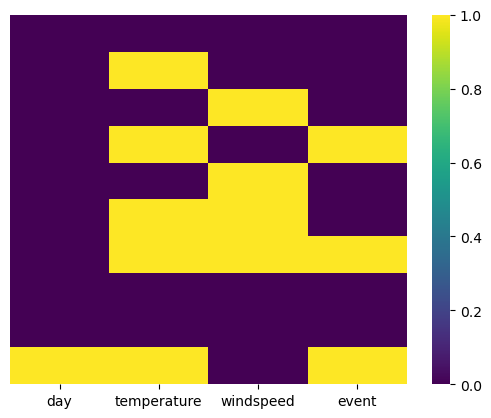

In [112]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

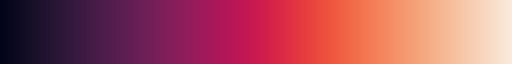

In [113]:
sns.color_palette("rocket", as_cmap=True)

<Axes: >

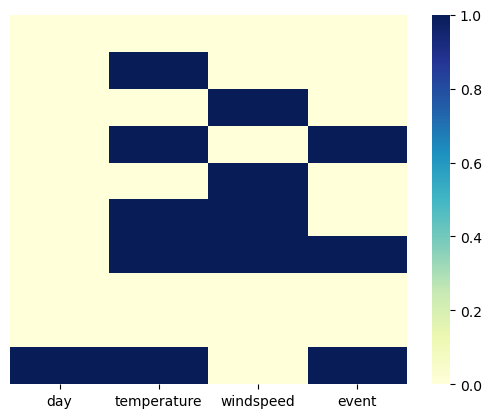

In [114]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")

In [115]:
new_df = df.dropna(thresh=2)
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [116]:
new_df = df.dropna()
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [117]:
df3 = df.fillna(0)
df3

,day,temperature,windspeed,event
0,2017-01-01 00:00:00,32.0,6.0,Rain
1,2017-01-04 00:00:00,0.0,9.0,Sunny
2,2017-01-05 00:00:00,28.0,0.0,Snow
3,2017-01-06 00:00:00,0.0,7.0,0
4,2017-01-07 00:00:00,32.0,0.0,Rain
5,2017-01-08 00:00:00,0.0,0.0,Sunny
6,2017-01-09 00:00:00,0.0,0.0,0
7,2017-01-10 00:00:00,34.0,8.0,Cloudy
8,2017-01-11 00:00:00,40.0,12.0,Sunny
9,0,0.0,8.4,0


In [118]:
df4 = df.fillna({
    'temperature' : 0,
    'windspeed' : 1,
    'event' : 'No Event'
})
df4

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,0.0,9.0,Sunny
2,2017-01-05,28.0,1.0,Snow
3,2017-01-06,0.0,7.0,No Event
4,2017-01-07,32.0,1.0,Rain
5,2017-01-08,0.0,1.0,Sunny
6,2017-01-09,0.0,1.0,No Event
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,0.0,8.4,No Event


In [119]:
# to replace with avegare value
new_df=df.copy()
new_df['temperature'].fillna(new_df['temperature'].mean(),inplace=True)
new_df['windspeed'].fillna(new_df['windspeed'].mean(),inplace=True)
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,33.2,9.0,Sunny
2,2017-01-05,28.0,8.4,Snow
3,2017-01-06,33.2,7.0,NaN
4,2017-01-07,32.0,8.4,Rain
5,2017-01-08,33.2,8.4,Sunny
6,2017-01-09,33.2,8.4,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,33.2,8.4,NaN


In [120]:
df
new_df = df.fillna(method='ffill') # fill next val with current val
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-09,32.0,7.0,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,2017-01-11,40.0,8.4,Sunny


In [121]:
df
new_df = df.fillna(method='bfill') # fill previous val with current val - traverse the table reverse 
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,28.0,9.0,Sunny
2,2017-01-05,28.0,7.0,Snow
3,2017-01-06,32.0,7.0,Rain
4,2017-01-07,32.0,8.0,Rain
5,2017-01-08,34.0,8.0,Sunny
6,2017-01-09,34.0,8.0,Cloudy
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,NaN,8.4,NaN


In [122]:
df
new_df = df.fillna(method='ffill',limit=2) # limits the ffill  with 2 to avoid too much repetition for more emptier columns
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-09,32.0,NaN,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,2017-01-11,40.0,8.4,Sunny


In [123]:
new_df = df[['temperature','windspeed']].interpolate()
new_df

,temperature,windspeed
0,32.000000,6.00
1,30.000000,9.00
2,28.000000,8.00
3,30.000000,7.00
4,32.000000,7.25
5,32.666667,7.50
6,33.333333,7.75
7,34.000000,8.00
8,40.000000,12.00
9,40.000000,8.40


In [124]:
df['temperature f']=df['temperature'].map(lambda x:x+10)
df

,day,temperature,windspeed,event,temperature f
0,2017-01-01,32.0,6.0,Rain,42.0
1,2017-01-04,NaN,9.0,Sunny,NaN
2,2017-01-05,28.0,NaN,Snow,38.0
3,2017-01-06,NaN,7.0,NaN,NaN
4,2017-01-07,32.0,NaN,Rain,42.0
5,2017-01-08,NaN,NaN,Sunny,NaN
6,2017-01-09,NaN,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy,44.0
8,2017-01-11,40.0,12.0,Sunny,50.0
9,NaT,NaN,8.4,NaN,NaN


In [125]:
def myconvert(num):
    if num<30:
        return num+10
    elif num>=30 and num<35:
        return num+20
    else:
        return num+30
    
df['temperature f']=df['temperature'].apply(myconvert) 
df

,day,temperature,windspeed,event,temperature f
0,2017-01-01,32.0,6.0,Rain,52.0
1,2017-01-04,NaN,9.0,Sunny,NaN
2,2017-01-05,28.0,NaN,Snow,38.0
3,2017-01-06,NaN,7.0,NaN,NaN
4,2017-01-07,32.0,NaN,Rain,52.0
5,2017-01-08,NaN,NaN,Sunny,NaN
6,2017-01-09,NaN,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy,54.0
8,2017-01-11,40.0,12.0,Sunny,70.0
9,NaT,NaN,8.4,NaN,NaN
